In [1]:
import nltk
import pandas as pd
import matplotlib
from collections import Counter

In [2]:
def read_metadata(filename):
    
    """ Read movie metadata and return dictionary mapping movie ID to year of release """
    years={}
    with open(filename) as file:
        file.readline()
        for line in file:
            cols=line.rstrip().split("\t")
            movieID=cols[0]
            year=int(cols[3])
            years[movieID]=year
    return years

In [3]:
years=read_metadata("../data/movie.metadata.tsv")

In [4]:
def read_data(filename, years):
    
    """ Input: path to movie summaries and dictionary mapping movie IDs to year of release
        Output: list of tokenized movie reviews, with each element being a (year, [tokens]) tuple
    
    """
    
    data=[]
    with open(filename) as file:
        for line in file:
            cols=line.rstrip().split("\t")
            movieID=cols[0]
            if movieID in years:
                # lowercase description
                description=cols[1].lower()
                
                # tokenize
                tokens=nltk.word_tokenize(description)
                
                # only count each word once per document
                unique_tokens=set(tokens)
                
                data.append((movieID, years[movieID], unique_tokens))
                
    return data               

In [5]:
data=read_data("../data/plot_summaries.txt", years)

In [6]:
def create_index(data):
    
    """ Create an inverted index from a word to the list of movies that contain it
    
        Output: 
            - index dict: {"love": {'31186339': 2012, '20663735': 2000, ... }, ... }
            - totals Counter, the number of movies released each year
    """
    
    index={}
    total_movies_by_year=Counter()
    words_to_docs={}
    for (movieID, date, tokens) in data:
        total_movies_by_year[date]+=1
        for word in tokens:
            if word not in index:
                index[word]={}
            index[word][movieID]=date
            
    return index, total_movies_by_year

In [7]:
index, total_movies_by_year=create_index(data)

In [8]:
def plot_time(index, query, totals):
    
    """ Plot time series of the fraction of movies that use a query term in a given year """
    
    counts=Counter()
    for movie in index[query]:
        year=index[query][movie]
        counts[year]+=1
    
    data=[]
    
    for year in counts:
        data.append((year, float(counts[year])/totals[year]))
            
    df=pd.DataFrame(data, columns=['date','movie frequency'])
    df.plot(x="date", y="movie frequency", kind = 'scatter', xlim=(1920,2013))

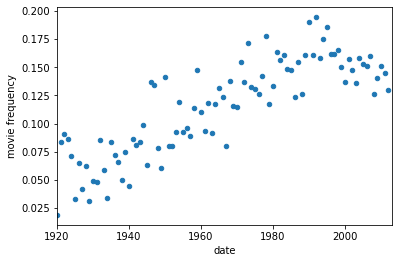

In [24]:
query="kill"
plot_time(index, query, total_movies_by_year)

In [25]:
def plot_time_dictionary(index, totals, dictionary):

    """ Plot time series of the fraction of movies that use a term in a dictionary in a given year """

    # fill in here -- you want to end up with a data list like in plot_time above

    df=pd.DataFrame(data, columns=['date','document frequency'])
    df.plot(x="date", y="document frequency", kind = 'scatter', xlim=(1920,2013))       


In [ ]:
dictionary={"love", "romance", "date"}
plot_time_dictionary(index, total_movies_by_year, dictionary)